# Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [ ]:
totalClass = 9
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [ ]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(45000, 32, 32, 3)
(45000, 9)
(9000, 32, 32, 3)
(9000, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


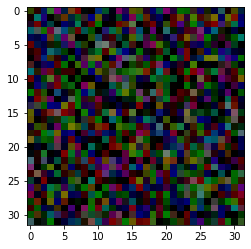

In [ ]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

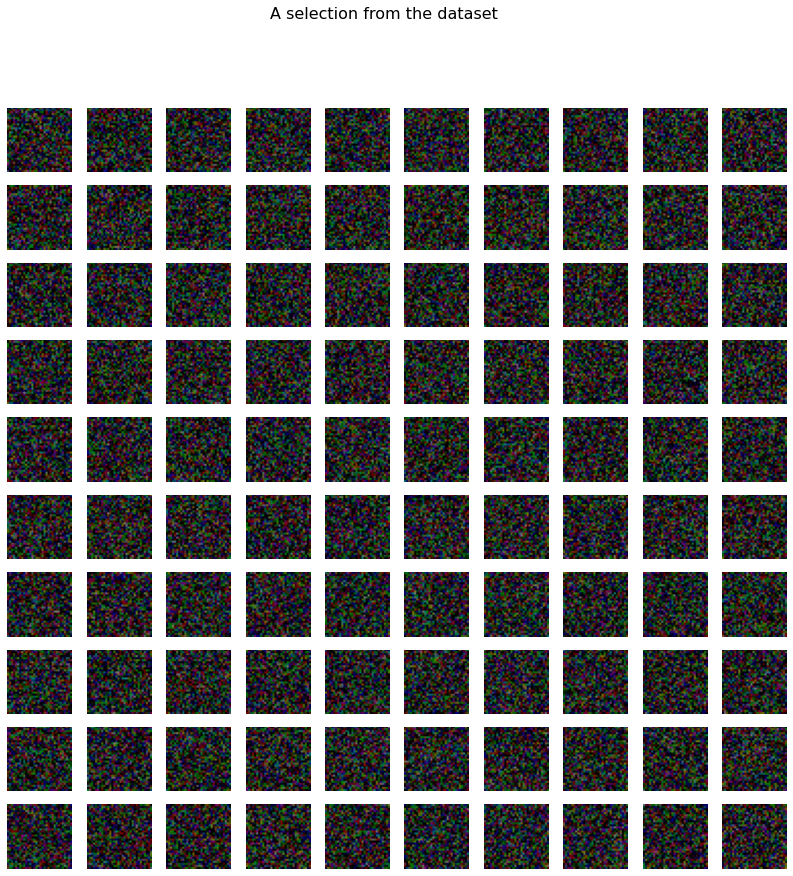

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [ ]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 12s 43ms/step - loss: 2.2047 - accuracy: 0.1113
test loss, test acc: [2.2047274112701416, 0.11126666516065598]
Evaluate on test data
18/18 [==============================] - 1s 75ms/step - loss: 2.2047 - accuracy: 0.1110
test loss, test acc: [2.204726457595825, 0.11100000143051147]


In [ ]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 16s 31ms/step - loss: 2.1982 - accuracy: 0.1097 - val_loss: 2.1974 - val_accuracy: 0.1111
Epoch 2/250
450/450 [==============================] - 14s 30ms/step - loss: 2.1975 - accuracy: 0.1101 - val_loss: 2.1974 - val_accuracy: 0.1112
Epoch 3/250
450/450 [==============================] - 14s 30ms/step - loss: 2.1972 - accuracy: 0.1110 - val_loss: 2.1973 - val_accuracy: 0.1110
Epoch 4/250
450/450 [==============================] - 14s 30ms/step - loss: 2.1971 - accuracy: 0.1134 - val_loss: 2.1973 - val_accuracy: 0.1148
Epoch 5/250
450/450 [==============================] - 14s 31ms/step - loss: 2.1967 - accuracy: 0.1169 - val_loss: 2.1975 - val_accuracy: 0.1167
Epoch 6/250
450/450 [==============================] - 13s 30ms/step - loss: 2.1966 - accuracy: 0.1189 - val_loss: 2.1976 - val_accuracy: 0.1121
Epoch 7/250
450/450 [==============================] - 14s 30ms/step - loss: 2.1964 - accuracy: 0.1194 - val_loss: 2.1974 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 3s 30ms/step - loss: 0.0162 - accuracy: 0.9942
test loss, test acc: [0.016227349638938904, 0.9941555261611938]
Evaluate on test data
18/18 [==============================] - 1s 29ms/step - loss: 8.3854 - accuracy: 0.1114
test loss, test acc: [8.385438919067383, 0.11144444346427917]


# Small

In [ ]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 1s 7ms/step - loss: 23.3902 - accuracy: 0.1112
test loss, test acc: [23.390199661254883, 0.11115555465221405]
Evaluate on test data
18/18 [==============================] - 0s 11ms/step - loss: 23.3505 - accuracy: 0.1124
test loss, test acc: [23.35050392150879, 0.1124444454908371]


In [ ]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 4s 7ms/step - loss: 3.8310 - accuracy: 0.1087 - val_loss: 2.1972 - val_accuracy: 0.1110
Epoch 2/250
450/450 [==============================] - 3s 7ms/step - loss: 2.2018 - accuracy: 0.1084 - val_loss: 2.1972 - val_accuracy: 0.1111
Epoch 3/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1992 - accuracy: 0.1082 - val_loss: 2.1972 - val_accuracy: 0.1111
Epoch 4/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1998 - accuracy: 0.1099 - val_loss: 2.1972 - val_accuracy: 0.1111
Epoch 5/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1985 - accuracy: 0.1087 - val_loss: 2.1972 - val_accuracy: 0.1111
Epoch 6/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1979 - accuracy: 0.1086 - val_loss: 2.1972 - val_accuracy: 0.1111
Epoch 7/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1981 - accuracy: 0.1084 - val_loss: 2.1972 - val_accuracy: 0.1111

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 1s 6ms/step - loss: 2.0349 - accuracy: 0.3315
test loss, test acc: [2.034935474395752, 0.33148887753486633]
Evaluate on test data
18/18 [==============================] - 0s 6ms/step - loss: 2.2182 - accuracy: 0.1114
test loss, test acc: [2.218238592147827, 0.11144444346427917]


#tNet

In [ ]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 5s 47ms/step - loss: 2.4661 - accuracy: 0.1112
test loss, test acc: [2.4660818576812744, 0.11117777973413467]
Evaluate on test data
18/18 [==============================] - 1s 63ms/step - loss: 2.4706 - accuracy: 0.1113
test loss, test acc: [2.470609426498413, 0.11133333295583725]


In [ ]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 20s 40ms/step - loss: 2.4260 - accuracy: 0.1108 - val_loss: 2.3015 - val_accuracy: 0.1119
Epoch 2/250
450/450 [==============================] - 18s 39ms/step - loss: 2.1504 - accuracy: 0.1775 - val_loss: 2.2681 - val_accuracy: 0.1063
Epoch 3/250
450/450 [==============================] - 18s 39ms/step - loss: 1.9764 - accuracy: 0.2734 - val_loss: 2.3001 - val_accuracy: 0.1142
Epoch 4/250
450/450 [==============================] - 18s 40ms/step - loss: 1.7880 - accuracy: 0.3639 - val_loss: 2.4076 - val_accuracy: 0.1137
Epoch 5/250
450/450 [==============================] - 18s 40ms/step - loss: 1.5942 - accuracy: 0.4428 - val_loss: 2.5535 - val_accuracy: 0.1171
Epoch 6/250
450/450 [==============================] - 18s 39ms/step - loss: 1.3964 - accuracy: 0.5190 - val_loss: 2.7485 - val_accuracy: 0.1128
Epoch 7/250
450/450 [==============================] - 18s 39ms/step - loss: 1.1714 - accuracy: 0.6013 - val_loss: 2.9937 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 3s 39ms/step - loss: 0.0018 - accuracy: 0.9997
test loss, test acc: [0.0017969621112570167, 0.9996888637542725]
Evaluate on test data
18/18 [==============================] - 1s 38ms/step - loss: 7.3093 - accuracy: 0.1083
test loss, test acc: [7.30929708480835, 0.10833333432674408]


# ConvNet

In [ ]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 8s 67ms/step - loss: 4.0118 - accuracy: 0.1112
test loss, test acc: [4.011764049530029, 0.11122222244739532]
Evaluate on test data
18/18 [==============================] - 2s 116ms/step - loss: 4.0156 - accuracy: 0.1119
test loss, test acc: [4.0155792236328125, 0.11188888549804688]


In [ ]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 19s 39ms/step - loss: 2.2105 - accuracy: 0.1080 - val_loss: 2.1973 - val_accuracy: 0.1108
Epoch 2/250
450/450 [==============================] - 18s 39ms/step - loss: 2.1974 - accuracy: 0.1091 - val_loss: 2.1972 - val_accuracy: 0.1112
Epoch 3/250
450/450 [==============================] - 18s 39ms/step - loss: 2.1973 - accuracy: 0.1096 - val_loss: 2.1973 - val_accuracy: 0.1111
Epoch 4/250
450/450 [==============================] - 18s 39ms/step - loss: 2.1973 - accuracy: 0.1088 - val_loss: 2.1973 - val_accuracy: 0.1110
Epoch 5/250
450/450 [==============================] - 17s 39ms/step - loss: 2.1972 - accuracy: 0.1073 - val_loss: 2.1973 - val_accuracy: 0.1111
Epoch 6/250
450/450 [==============================] - 18s 39ms/step - loss: 2.1973 - accuracy: 0.1073 - val_loss: 2.1973 - val_accuracy: 0.1113
Epoch 7/250
450/450 [==============================] - 18s 39ms/step - loss: 2.1973 - accuracy: 0.1096 - val_loss: 2.1972 - val_ac

In [25]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 4s 46ms/step - loss: 2.1972 - accuracy: 0.1111
test loss, test acc: [2.197225332260132, 0.1111111119389534]
Evaluate on test data
18/18 [==============================] - 1s 45ms/step - loss: 2.1972 - accuracy: 0.1111
test loss, test acc: [2.1972248554229736, 0.1111111119389534]


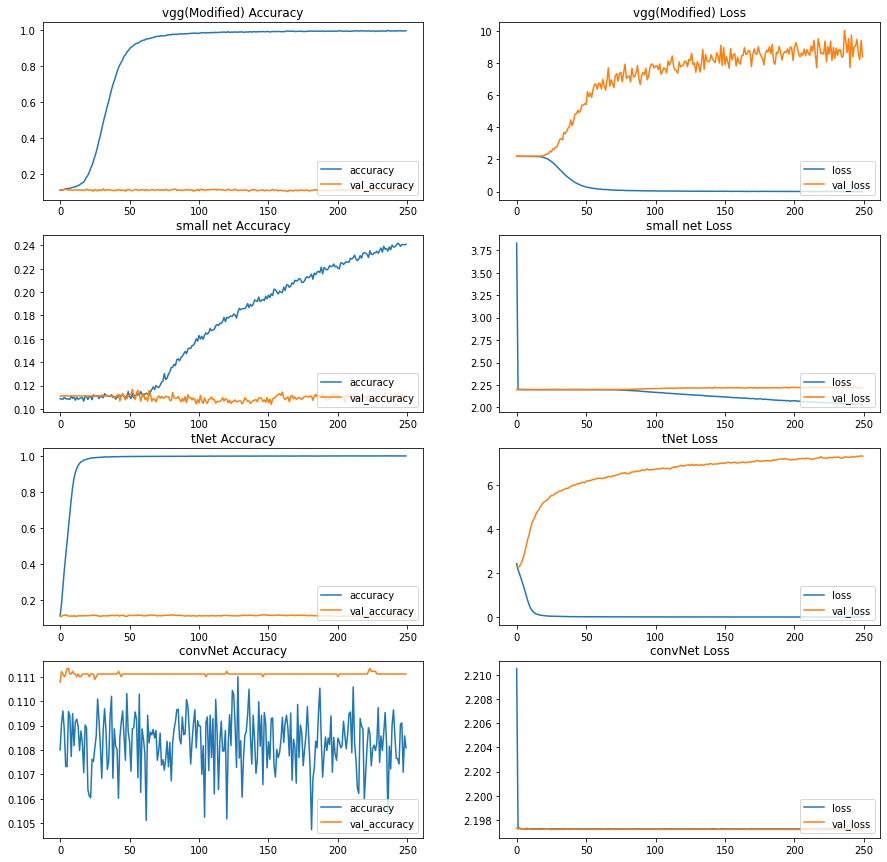

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
